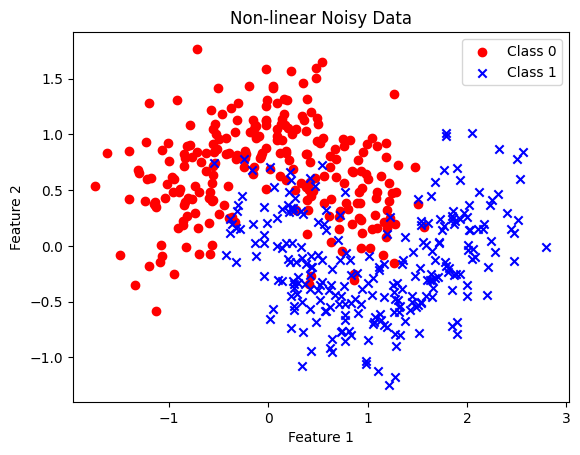

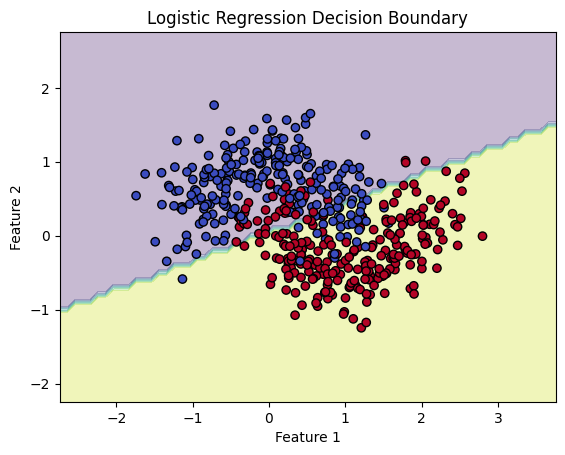

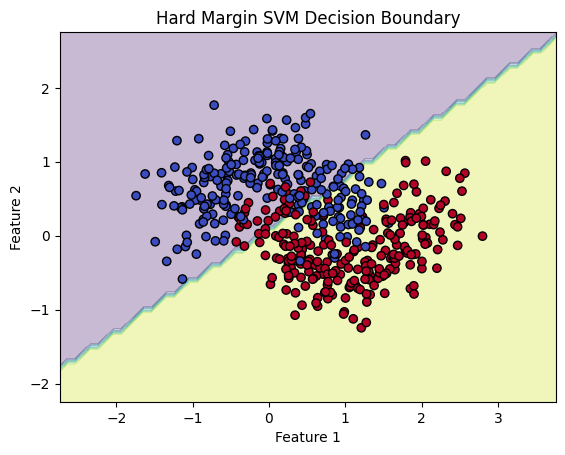

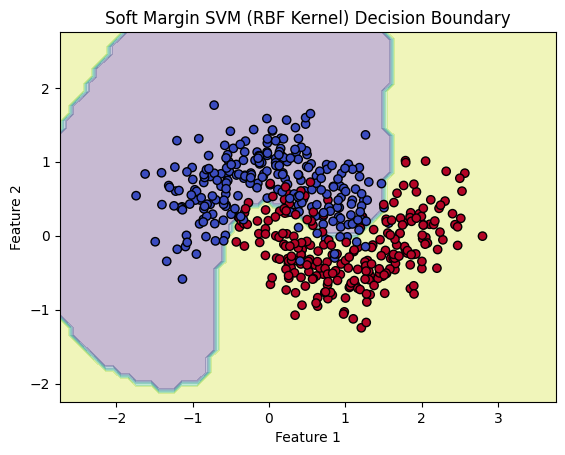

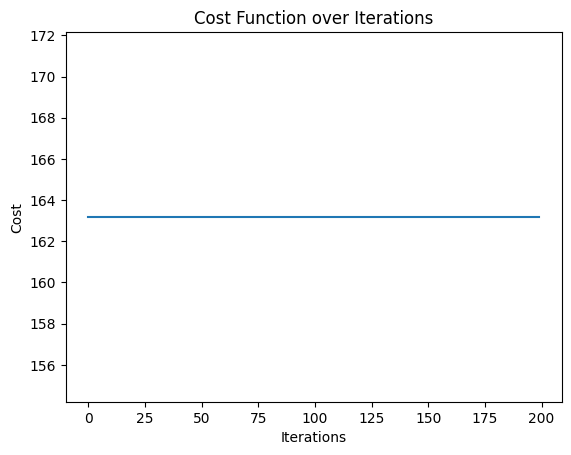

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Generate a non-linear noisy data
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
plt.legend()
plt.title("Non-linear Noisy Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")

plt.figure()
plot_decision_boundary(log_reg, X, y)
plt.title("Logistic Regression Decision Boundary")
plt.show()

# Hard Margin SVM (Linear Kernel without regularization)
svm_hard = SVC(kernel='linear', C=1e10)  # Large C for hard margin
svm_hard.fit(X, y)

plt.figure()
plot_decision_boundary(svm_hard, X, y)
plt.title("Hard Margin SVM Decision Boundary")
plt.show()

# Soft Margin SVM (RBF Kernel with regularization)
svm_soft = SVC(kernel='rbf', C=1.0)  # C is the regularization parameter
svm_soft.fit(X, y)

plt.figure()
plot_decision_boundary(svm_soft, X, y)
plt.title("Soft Margin SVM (RBF Kernel) Decision Boundary")
plt.show()

# Visualize Cost Function for Logistic Regression
def plot_cost_function(model, X, y):
    costs = []
    for _ in range(200):
        model.fit(X, y)
        cost = -np.sum(y * np.log(model.predict_proba(X)[:,1]) + (1 - y) * np.log(1 - model.predict_proba(X)[:,1]))
        costs.append(cost)

    plt.plot(costs)
    plt.title("Cost Function over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

plt.figure()
plot_cost_function(log_reg, X, y)
